In [1]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install matplotlib

# Import required packages here (after they are installed)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp
from pylab import show

# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [2]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]



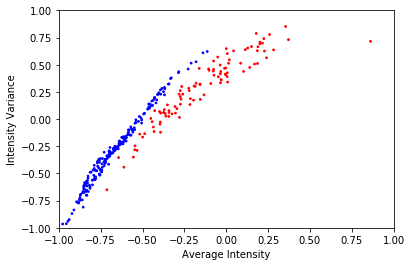

In [28]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
for index in range(len(trainFeatures)):
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#display the current graph
show()

In [38]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = KNeighborsClassifier(n_neighbors=1)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

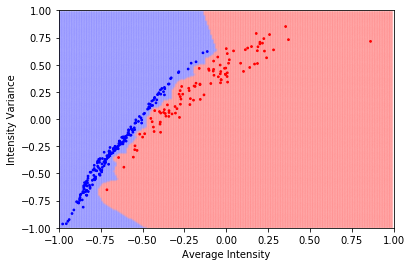

In [40]:
## Visualize Results
#plot the points
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")
show()